In [7]:
%matplotlib inline

import numpy as np
from numpy import exp, sqrt, sin, cos
from numpy import radians as rad
from numpy.linalg import norm
import matplotlib.pyplot as plt
import scipy.integrate as integrate
import math
import scipy.special as sp
import capLib
import fdulib
#plt.ion()
plt.close("all")

vectors

In [8]:
v_g = np.array([0., 220.,0.]) # galactic rotational velocity
v_s = np.array([-9., 12., 7.]) # Sun proper motion
beta = np.array([rad(174.4697), rad(59.575), rad(29.812)]) # degrees->denotes eliptic lat
epsilon1 = np.array([0.9931, 0.1170,-0.01032])
epsilon2 = np.array([-0.067, 0.4927,-0.8676])
T = np.array([76.1, 156.3, 352.4]) # phases in days

constants

In [9]:

u_e = 29.79 # km/s fornengo 
e = 0.016722
lambda0 = rad(13.) # degrees
w = 2. * np.pi / 365.
v_0 = 220.
sigma = 3* (v_0**2) / 2
v_min = 0
v_max = 650

first check the velocity transformation of the WIMPs velocities $\vec{v}$ in the halos rest frame to $\vec{\omega}$ in the Earth rest frame. This is done as described in [fornengo and Scopel(2008)]

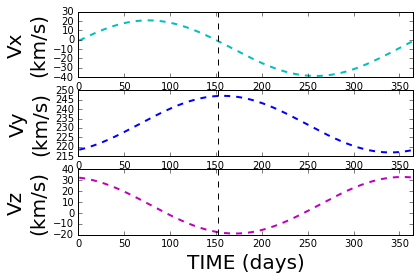

In [10]:
def u(t):
                """ 
                t denotes time in days relative to UT noon on 
                December 31
                """
                L = rad(280.460) + (rad(0.9856474) * t)
                g = rad(357.528) +(rad(0.9856003) * t)
                lam = L + (rad(1.915) * sin(g)) + (rad(0.02) * sin(2 * g))
                return u_e * (1 - (e * sin(lam - lambda0)))

#def v_EARTH(t):
#                v_eliptic = u(t)*cos(beta)*cos(w*(t-T))
#                v = v_g + v_s + v_eliptic
#                modulus = sqrt(v[0]**2 + v[1]**2 + v[2]**2)
#                return v, modulus

def v_EARTH(t):
                    X = (2*np.pi/365.)*(t-80.)
                    v_eliptic = u_e*((epsilon1*cos(X))+(epsilon2*sin(X)))
                    v = v_g + v_s + v_eliptic
                    modulus = sqrt(v[0]**2 + v[1]**2 + v[2]**2) 
                    return v, modulus
            
fig ,(ax1, ax2,ax3) = plt.subplots(3,1)
time =  [i for i in np.arange(1,366)]
array = map(v_EARTH, time)

vx = np.array([array[i][0][0] for i in range(0,len(array))])
vy = np.array([array[i][0][1] for i in range(0,len(array))])
vz = np.array([array[i][0][2] for i in range(0,len(array))])
modulus = np.array([array[i][1] for i in range(0,len(array))])


ax1.set_xlim([0,365])
ax1.set_ylabel('Vx\n(km/s)',fontsize=20)
ax1.plot(time, vx, 'c--',linewidth=2.0)
ax1.plot((152.,152.), (-40., 30.), 'k--')

ax2.set_xlim([0,365])
ax2.set_ylabel('Vy\n(km/s)',fontsize=20)
ax2.plot(time, vy, 'b--',linewidth=2.0)
ax2.plot((152.,152.), (215., 250.), 'k--')

ax3.set_xlim([0,365])
ax3.set_ylabel('Vz\n(km/s)',fontsize=20)
ax3.plot(time, vz, 'm--',linewidth=2.0)
ax3.set_xlabel('TIME (days)',fontsize=20)
ax3.plot((152.,152.), (-20., 40.), 'k--')

fig ,(ax4,ax5) = plt.subplots(2,1)

ax4.plot((152.,152.), (215., 250.), 'k--')
ax4.set_xlim([0,365])
ax4.set_ylabel('|v|\n(km/s)',fontsize=20)
ax4.plot(time, modulus, 'r--',linewidth=2.0)
ax4.set_xlabel('TIME (days)',fontsize=20)


x_av = (max(vx)+min(vx))/2
y_av = (max(vy)+min(vy))/2
z_av = (max(vz)+min(vz))/2
modulus_av = (max(modulus)+min(modulus))/2

ax5.set_xlim([0,365])
ax5.set_ylim([-30,30])
ax5.set_ylabel('km/s\nfrom average',fontsize=20)

ax5.plot(time, vx-x_av, 'c--',linewidth=2.0)
ax5.plot(time, vy-y_av, 'b--',linewidth=2.0)
ax5.plot(time, vz-z_av, 'm--',linewidth=2.0)
ax5.plot(time, modulus-modulus_av, 'r--',linewidth=2.0)

ax5.set_xlabel('TIME (days)',fontsize=20)

plt.plot((152.,152.), (-215., 250.), 'k--')
plt.show()


Here we can see that the dominant component is the y component because is aline with the circular speed of the Sun. Thus when considering the modulus in becomes almost in the same curve of the y_component.


Now the function that gives $I(t,v_{min})$ factor [fornengo and Scopel(2008)] that is proportional to the Dark Matter direct detection differential rate  $dR/dE_R$: $$\frac{dR}{dE_R}\propto I(t,v_{min}) = \int_{\omega\geq v_{min}} d\vec{\omega}\,\, \frac{f_{ES}(\vec{\omega})}{\omega}$$ 
Where $f_{ES}$ is the velocity distribution function for wimps with a velocity $\vec{\omega}$ in the Earth rest frame as described above. 

In [5]:
def I(t, flag=True):
        def gaussian(v, vi):
                return exp(-((v+vi)**2)/(2 * sigma))

        def n(vi):
                 return integrate.quad(gaussian,v_min,v_max, args=(vi,))[0]

        def u(t):
                """ 
                t denotes time in days relative to UT noon on 
                December 31
                """
                L = rad(280.460) + (rad(0.9856474) * t)
                g = rad(357.528) +(rad(0.9856003) * t)
                lam = L + (rad(1.915) * sin(g)) + (rad(0.02) * sin(2 * g))
                return u_e * (1 - (e * sin(lam - lambda0)))

        
        def v_EARTH(t):
                X = (2*np.pi/365.)*(t-80.)
                v_eliptic = u_e*((epsilon1*cos(X))+(epsilon2*sin(X)))
                v = v_g + v_s + v_eliptic
                modulus = sqrt(v[0]**2 + v[1]**2 + v[2]**2) 
                return v, modulus
                                 
                                 
        
                                 
                                 
        def integrand(vz,vy,vx):
                v_E, _ = v_EARTH(t)
                v = np.array([vx,vy,vz])
                vsum = v + v_E
                W = norm(v)
                return (gaussian(vx,v_E[0]) * gaussian(vy,v_E[1]) * gaussian(vz,v_E[2])) / W
                                                 
        def Vymax(Vx):
                return sqrt(v_max**2 - Vx**2)
        
        def Vzmax(Vx,Vy):
                return sqrt(v_max**2 - Vx**2 - Vy**2)

        def Vymin(Vx):
                return 0#sqrt(v_min**2 - Vx**2)
        
        def Vzmin(Vx,Vy):
                return 0#sqrt(v_min**2 - Vx**2 - Vy**2)
        
        
        ## now we integrate
         
        #result = integrate.nquad(integrand, [[v_min, v_max],[v_min, v_max],[v_min, v_max]])
        v_E, _ = v_EARTH(t)
        N = n(v_E[0]) * n(v_E[1]) * n(v_E[2])
        result = integrate.tplquad(integrand,v_min,v_max,Vymin,Vymax,Vzmin, Vzmax)
        
        ######### FLAG #########
        if flag==True:
            print "t =",t,", normalzation =",N,", value =",result[0]/ N
        ########################
        return result[0]/ N 


In [ ]:
cont = 0
#time = np.array([i for i in np.arange(1,365,50)])
time = np.array([1,65,152,225,300,364])
fig ,ax = plt.subplots()
ax.set_xlim([0,365])
for v_min in (0, 200, 400):
        cont += 1
        print "when t=1"
        print "run number:",cont, "with vmin :", v_min
        print '_______________________________________'
        array = np.array(map(I, time))
        base = array[0]
        array2 = np.divide(array,base)
        ax.plot(time, array2, 'b--', linewidth=2.0)
        
plt.show()
        
        

when t=1
run number: 1 with vmin : 0
_______________________________________


In [17]:
def to_norm(x,v,t):
        _ , modu = v_EARTH(t)
        u = sqrt((v**2) + (modu**2) + (2 * v * modu * x)) 
        sigma = (3. * (220.**2) / 2)
        return (u**2)*exp(- (u**2) / (2. * sigma))

def trans(x,v,t):
        _ , modu = v_EARTH(t)
        u = sqrt((v**2) + (modu**2) + (2 * v * modu * x)) 
        sigma = (3. * (220.**2) / 2)
        return (v) * exp(- (u**2) / (2. * sigma))

In [18]:
def I_mod(t):
        result = integrate.nquad(trans, [[-1, 1],[v_min,v_max]], args=(t,))[0]
        n = integrate.nquad(to_norm, [[-1, 1],[v_min,v_max]], args=    (t,))[0]
        print t, n
        return result/n

_____________________  v_min = 0 ____________________
__
1 49253137.9672
11 49284831.1992
21 49326121.2606
31 49375136.3143
41 49429756.2959
51 49487757.2795
61 49546949.5168
71 49605296.4049
81 49661004.94
91 49712582.3551
101 49758857.9912
111 49798973.445
121 49832347.2283
131 49858622.314
141 49877605.9367
151 49889210.9147
161 49893406.7252
171 49890186.7791
181 49879556.0479
191 49861540.5778
201 49836217.7079
211 49803763.1734
221 49764508.9208
231 49719003.6055
241 49668066.5953
251 49612826.0691
261 49554732.647
271 49495541.97
281 49437262.7159
291 49382070.4373
301 49332191.9433
311 49289769.1465
321 49256714.7451
331 49234574.1982
341 49224408.7455
351 49226712.5301
361 49241373.3379
371 49267681.5297
_____________________  v_min = 200 ____________________
__
1 34376657.8017
11 34337710.0121
21 34286064.4553
31 34223344.5984
41 34151504.6297
51 34072759.5999
61 33989509.1216
71 33904258.1703
81 33819538.2507
91 33737831.7135
101 33661501.4301
111 33592727.4226
121 33533451.

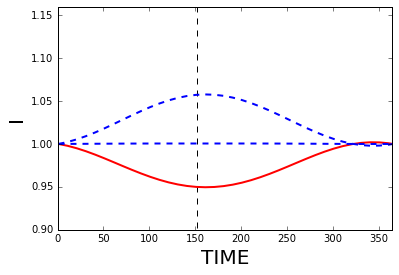

In [20]:
TIME = np.array([i for i in np.arange(1,375,10)])
#TIME = np.array([1,65,152,225,300,364])


#array = np.array(DF(TIME, 400))
#array = np.divide(array,base)


########################################################################
fig ,ax = plt.subplots()
ax.set_xlabel('TIME',fontsize=20)
ax.set_ylabel('I',fontsize=20)
#ax.set_yscale('log')
ax.set_ylim([0.9, 1.16])
ax.set_xlim([0,365.])

plt.plot((152.,152.), (-2., 3.), 'k--')

for v_min in [0,200,1800]:
        line= 'b-'
        print '_____________________  v_min =', v_min, '____________________'

        if v_min%100 == 0:
                line = 'b--'
        if v_min == 0:
                line = 'r-'

        print "__"
        array = map(I_mod,TIME)
        base = array[0]
        array2 = np.divide(array,base)
        ax.plot(TIME, array2, line, linewidth=2.0)

In [54]:

def gaussian(v, v_ei):
        return exp(-((v + v_ei)**2)/(2 * sigma))

def n(vi):
        return integrate.quad(gaussian, v_min, v_max, args=(vi,))[0]


        
def v_EARTH(t):
        """
        magni's notation
        """
        X = (2*np.pi/365.)*(t-80.)
        v_eliptic = u_e*((epsilon1*cos(X))+(epsilon2*sin(X)))
        v = v_g + v_s + v_eliptic
        modulus = sqrt(v[0]**2 + v[1]**2 + v[2]**2) 
        return v, modulus
                                 
def I_3d_sph(t, flag=True):
        v_E, _ = v_EARTH(t)                         
                                 
        def integrand(vx,vy,vz):
                return (gaussian(vx,v_E[0]) * gaussian(vy,v_E[1]) * gaussian(vz,v_E[2])) / norm(np.array([vx,vy,vz])+v_E)
        
                                 
        def Vymax(Vx):
                return sqrt(v_max**2 - Vx**2)
        
        def Vzmax(Vx,Vy):
                return sqrt(v_max**2 - Vx**2 - Vy**2)


        ## now we integrate
         
        #result = integrate.nquad(integrand, [[v_min, v_max],[v_min, v_max],[v_min, v_max]]
        N = n(v_E[0]) * n(v_E[1]) * n(v_E[2])
        result = integrate.tplquad(integrand,v_min,v_max,lambda a:0,Vymax,lambda a, y:0, Vzmax)
        
        ######### FLAG #########
        if flag==True:
            print "t =",t,", normalzation =",N,", value =",result[0]/ N
        ########################
        return result[0]/ N 

In [55]:
cont = 0
#time = np.array([i for i in np.arange(1,365,50)])
time = np.array([1,65,152,225,300,364])
fig ,ax = plt.subplots()
ax.set_xlim([0,365])
for v_min in (0, 200, 400):
        cont += 1
        print "when t=1"
        print "run number:",cont
        print '_______________________________________'
        array = np.array(map(I_3d_sph, time))
        base = array[0]
        array2 = np.divide(array,base)
        ax.plot(time, array2, 'b--', linewidth=2.0)
        
plt.show()


when t=1
run number: 1
_______________________________________
t = 1 , normalzation = 14135418.0824 , value = 0.00203665035504
t = 65 , normalzation = 13154529.9844 , value = 0.00199899729147
t = 152 , normalzation = 14082177.2247 , value = 0.00199949910534
t = 225 , normalzation = 15720097.4703 , value = 0.00204348730005
t = 300 , normalzation = 15643163.9757 , value = 0.00206601631476
t = 364 , normalzation = 14182309.9467 , value = 0.00203794275545
when t=1
run number: 2
_______________________________________
t = 1 , normalzation = 769172.165848 , value = 0.0129968341212
t = 65 , normalzation = 692591.955382 , value = 0.0139389816723
t = 152 , normalzation = 790144.184514 , value = 0.0140801890895
t = 225 , normalzation = 939423.298263 , value = 0.0130780569809
t = 300 , normalzation = 912973.057245 , value = 0.0124840239501
t = 364 , normalzation = 773247.667933 , value = 0.0129692736919
when t=1
run number: 3
_______________________________________
t = 1 , normalzation = 9399.854

In [48]:
def to_norm(v,v_e):
        f1 = v*exp(-(1./(2.*sigma))*(v**2 - v_e**2))/ (2*sigma*np.pi*v_e)
        f2 = exp(v*v_e/sigma)-exp(-v*v_e/sigma)
        return f1 * f2

def trans(x,v,v_e):
        u = sqrt((v**2) + (v_e**2) + (2 * v * v_e * x))
        f1 = v*exp(-(1./(2.*sigma))*(v**2 - v_e**2))/ (2*sigma*np.pi*v_e)
        f2 = exp(v*v_e/sigma)-exp(-v*v_e/sigma)
        return f1 * f2 / u
    
    
def I_mod_M(t):
        _,v_e = v_EARTH(t)
        result = integrate.nquad(trans, [[-1,1],[v_min,v_max]], args=(v_e,))[0]
        n = integrate.quad(to_norm, v_min,v_max, args=(v_e,))[0]
        print t, n
        return result/n

_____________________  v_min = 0 ____________________
__
1 0.002345174701
65 0.00250487417326
152 0.00272642298409
225 0.00261655574842
300 0.00238342228028
364 0.00234294312273
_____________________  v_min = 200 ____________________
__
1 0.00214678701223
65 0.00229799639699
152 0.00250806397066
225 0.00240384928681
300 0.00218298385584
364 0.00214467543401
_____________________  v_min = 400 ____________________
__
1 0.00124309244704
65 0.00134398984092
152 0.00148516945993
225 0.001414990162
300 0.00126718691172
364 0.00124168804412


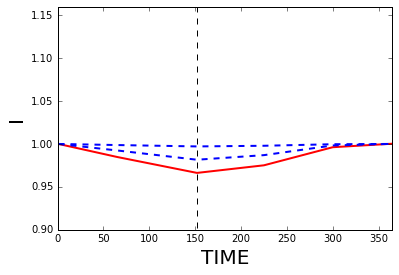

In [49]:
TIME = np.array([1,65,152,225,300,364])


#array = np.array(DF(TIME, 400))
#array = np.divide(array,base)


########################################################################
fig ,ax = plt.subplots()
ax.set_xlabel('TIME',fontsize=20)
ax.set_ylabel('I',fontsize=20)
#ax.set_yscale('log')
ax.set_ylim([0.9, 1.16])
ax.set_xlim([0,365.])

plt.plot((152.,152.), (-2., 3.), 'k--')

for v_min in [0,200,400]:
        line= 'b-'
        print '_____________________  v_min =', v_min, '____________________'

        if v_min%100 == 0:
                line = 'b--'
        if v_min == 0:
                line = 'r-'

        print "__"
        array = map(I_mod_M,TIME)
        base = array[0]
        array2 = np.divide(array,base)
        ax.plot(TIME, array2, line, linewidth=2.0)

In [34]:
v=6
v_e=3

f1 = v*exp(-(1./(2.*sigma))*(v**2 - v_e**2))/ (2*sigma*np.pi*v_e)

